# MIT808 Maize Disease Detection EDA

Boikanyo Radiokana u16097492

Wendy Mapamela u23970911

18-03-2024

In [37]:
# Libraries

!pip install rembg
!pip install rarfile
from rembg import remove
from PIL import Image
import cv2
import numpy as np
from zipfile import ZipFile
from PIL import Image
import os
import rarfile
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

In [2]:
#mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Code to remove background from images

In [3]:
def remove_bg(input_path, output_path):

  # Processing the image
  input = Image.open(input_path)

  # Remove background
  output = remove(input)

  #Saving the image
  output.save(output_path)

  return

# Get image sizes in the folders

In [8]:
def get_image_sizes(extract_folder_path):

    image_sizes = []

    # Iterate through extracted images
    for file_name in os.listdir(extract_folder_path):
        file_path = os.path.join(extract_folder_path, file_name)
        if os.path.isfile(file_path):
            try:
                # Open the image file
                with Image.open(file_path) as img:
                    # Get the size of the image
                    size = img.size
                    # Append the size to the list
                    image_sizes.append(size)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    return image_sizes

# Extract zip or rar files

In [9]:
# Extract the zip folder

def extract_images(zip_folder_path,foldername ):

  extracted_path = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/'+foldername

  with ZipFile(zip_folder_path, 'r') as zip_ref:
     # Extract all files to output folder
      zip_ref.extractall(extracted_path)

  return extracted_path


In [10]:
#Extract .rar zip folder
def extract_rar(rar_file, foldername):

    extract_folder = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/'+foldername
    # Create the extract folder if it doesn't exist
    os.makedirs(extract_folder, exist_ok=True)

    with rarfile.RarFile(rar_file, 'r') as rf:
        # Extract all files to output folder
        rf.extractall(extract_folder)

    return


## Define the path to the zip file for the diseases

In [21]:
comm_rust_path = '/content/drive/MyDrive/mit808-maize-disease-detection/maize_Common_rust.zip'
folder_1 = '/Corn_(maize)___Common_rust_'

lnicro_path = '/content/drive/MyDrive/mit808-maize-disease-detection/maize_Lethal_Necrosis.zip'
folder_2 = '/MLN 1&2'

cers_leaf_path = '/content/drive/MyDrive/mit808-maize-disease-detection/maize___Cercospora_leaf_spot.zip'
folder_3 = '/Cercospora_leaf_spot'

leaf_blight_path = '/content/drive/MyDrive/mit808-maize-disease-detection/maize_northern_leaf_blight.zip'
folder_4 = '/leaf_blight'

streak_virus_path = '/content/drive/MyDrive/mit808-maize-disease-detection/maize_streak_virus_01.rar'
folder_5 = '/streak_virus'

healthy_path = '/content/drive/MyDrive/mit808-maize-disease-detection/Healthy_Maize.zip'
folder_5 = '/healthy'

# Extract Images from Zip files

In [177]:
extract_common_rust = extract_images(comm_rust_path,folder_1 )
extract_nicro = extract_images(lnicro_path,folder_2 )
extract_cercospora_leaf_spot = extract_images(cers_leaf_path,folder_3 )
extract_leaf_blight = extract_images(leaf_blight_path,folder_4 )
extract_healthy = extract_images(healthy_path,folder_5 )
extract_rar(streak_virus_path, folder_5)


# Get image sizes (x,y)

In [23]:
# paths to extracted image folders
extract_common_rust = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/common_rust/Corn_(maize)___Common_rust_'
extract_nicro = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/maize_Lethal_Necrosis/MLN 1&2'
extract_cers_leaf = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/Cercospora_leaf_spot/Corn_(maize)___Cercospora_leaf_spot'
extract_leaf_blight = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/leaf_blight/Corn_(maize)___Northern_Leaf_Blight'
extract_streak_virus = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/streak_virus/maize_streak_01/maize_streak_01'
extract_healthy = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/healthy/HEATHLY_1'

In [24]:
common_rust_sizes = get_image_sizes(extract_common_rust)

In [26]:
lnicro_sizes = get_image_sizes(extract_nicro)

Error processing /content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/maize_Lethal_Necrosis/MLN 1&2/via_project_9Jun2021_0h6m_coco.json: cannot identify image file '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/maize_Lethal_Necrosis/MLN 1&2/via_project_9Jun2021_0h6m_coco.json'
Error processing /content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/maize_Lethal_Necrosis/MLN 1&2/via_project_9Jun2021_10h37m_coco.json: cannot identify image file '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/maize_Lethal_Necrosis/MLN 1&2/via_project_9Jun2021_10h37m_coco.json'


In [28]:
cers_leaf_sizes = get_image_sizes(extract_cers_leaf)

In [29]:
leaf_blight_sizes = get_image_sizes(extract_leaf_blight)

In [30]:
streak_virussizes = get_image_sizes(extract_streak_virus)

Error processing /content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/streak_virus/maize_streak_01/maize_streak_01/1627936105713_jpg.rf.4b05b0c26125d852cf274496f45923d7.xml: cannot identify image file '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/streak_virus/maize_streak_01/maize_streak_01/1627936105713_jpg.rf.4b05b0c26125d852cf274496f45923d7.xml'
Error processing /content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/streak_virus/maize_streak_01/maize_streak_01/1627936105713_jpg.rf.c7852dd0a600a368adf358e8cf9f1d32.xml: cannot identify image file '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/streak_virus/maize_streak_01/maize_streak_01/1627936105713_jpg.rf.c7852dd0a600a368adf358e8cf9f1d32.xml'
Error processing /content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/streak_virus/maize_streak_01/maize_streak_01/1627936115183_jpg.rf.9300ef92678f1bd5a5ffab341df41d2

In [31]:
healthy_size = get_image_sizes(extract_healthy)

Error processing /content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/healthy/HEATHLY_1/.DS_Store: cannot identify image file '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/healthy/HEATHLY_1/.DS_Store'


# Get actual image sizes

In [32]:
# convert pixels to bits
def image_size_multiplied(image_sizes):

  multiplied_sizes = []

  for size in image_sizes:

      result = size[0] * size[1]

      multiplied_sizes.append(result)

  return multiplied_sizes

In [33]:
# convert pixels to kilobytes
def convert_to_kilobtyes(total_bits):

  total_bits_np = np.array(total_bits)

  #kilobits
  total_kilobits = total_bits_np/1024  # 1 kilobit = 1024 bits

  # Convert kilobits to kilobytes (KB)
  total_kilobytes = total_kilobits / 8  # 1 kilobyte = 8 kilobit

  return total_kilobytes

In [35]:
# convert pixels to bits
m_size_common_rust = image_size_multiplied(common_rust_sizes)
m_size_lnicro = image_size_multiplied(lnicro_sizes)
m_size_cers_leaf = image_size_multiplied(cers_leaf_sizes)
m_size_leaf_blight = image_size_multiplied(leaf_blight_sizes)
m_size_streak_virus = image_size_multiplied(streak_virussizes)
m_size_healthy_size = image_size_multiplied(healthy_size)

# convert pixels to kilobytes
kb_common_rust = convert_to_kilobtyes(m_size_common_rust)
kb_lnicro = convert_to_kilobtyes(m_size_lnicro)
kb_size_cers_leaf = convert_to_kilobtyes(m_size_cers_leaf)
kb_size_leaf_blight = convert_to_kilobtyes(m_size_leaf_blight)
kb_size_streak_virus = convert_to_kilobtyes(m_size_streak_virus)
kb_size_healthy_size = convert_to_kilobtyes(m_size_healthy_size)


## Image size visualisation

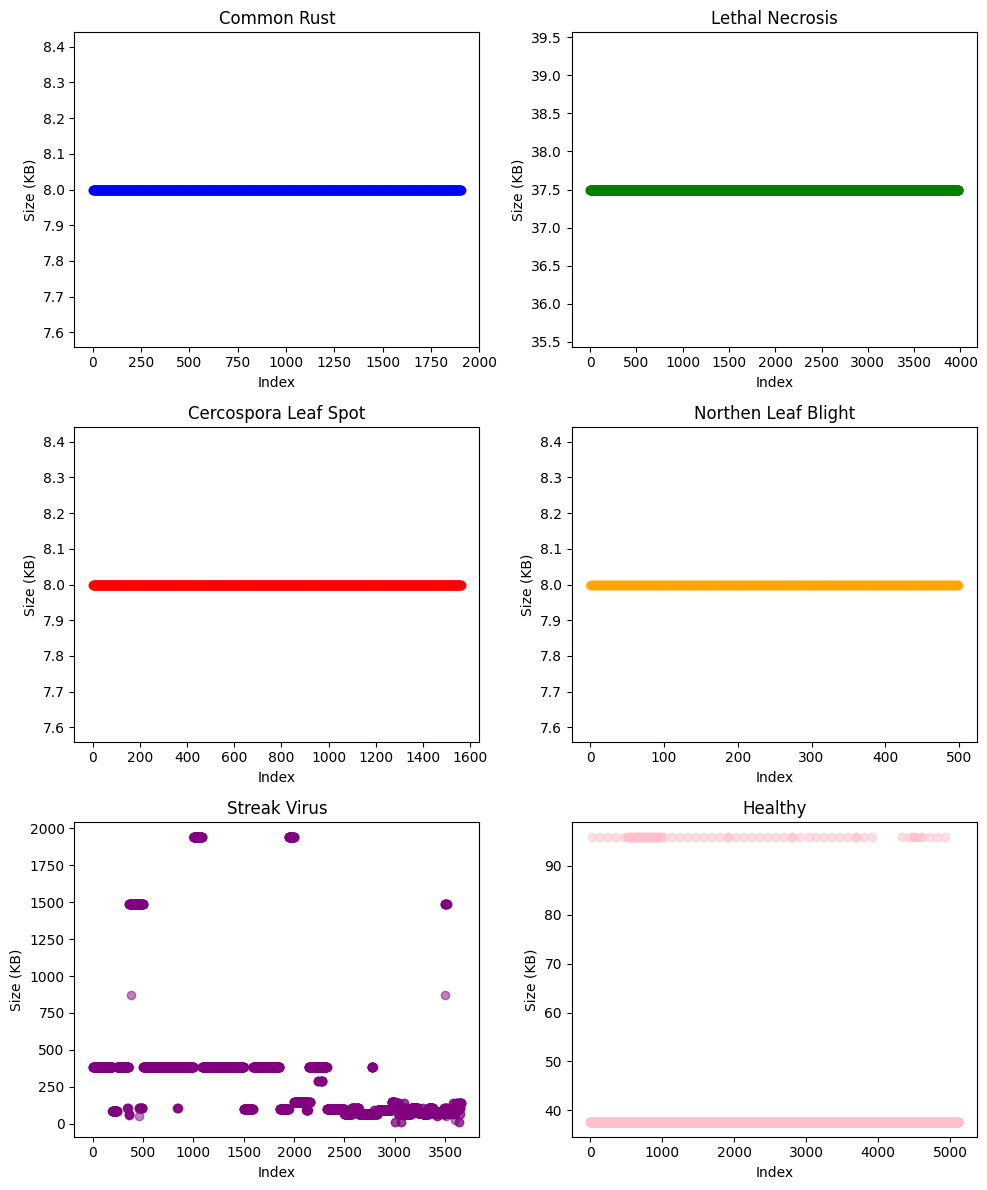

In [39]:
# Creating subplots for scatter plots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Plotting scatter plots for each array
axes[0, 0].scatter(range(len(kb_common_rust)), kb_common_rust, color='blue', alpha=0.5)
axes[0, 0].set_title('Common Rust')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Size (KB)')

axes[0, 1].scatter(range(len(kb_lnicro)), kb_lnicro, color='green', alpha=0.5)
axes[0, 1].set_title('Lethal Necrosis')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('Size (KB)')

axes[1, 0].scatter(range(len(kb_size_cers_leaf)), kb_size_cers_leaf, color='red', alpha=0.5)
axes[1, 0].set_title('Cercospora Leaf Spot')
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('Size (KB)')

axes[1, 1].scatter(range(len(kb_size_leaf_blight)), kb_size_leaf_blight, color='orange', alpha=0.5)
axes[1, 1].set_title('Northen Leaf Blight')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Size (KB)')

axes[2, 0].scatter(range(len(kb_size_streak_virus)), kb_size_streak_virus, color='purple', alpha=0.5)
axes[2, 0].set_title('Streak Virus')
axes[2, 0].set_xlabel('Index')
axes[2, 0].set_ylabel('Size (KB)')

axes[2, 1].scatter(range(len(kb_size_healthy_size)), kb_size_healthy_size, color='pink', alpha=0.5)
axes[2, 1].set_title('Healthy')
axes[2, 1].set_xlabel('Index')
axes[2, 1].set_ylabel('Size (KB)')


# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()



# Distirbution of diseases

In [40]:
data = {
    'Disease Type': ['Common_Rust', 'Lethal_Necrosis', 'Cercospora_leaf_spot', 'Northern_leaf_blight', 'Streak_Virus', 'Healthy'],
    'Number of Elements': [len(common_rust_sizes), len(lnicro_sizes), len(cers_leaf_sizes), len(leaf_blight_sizes), len(streak_virussizes), len(healthy_size)]
}

df = pd.DataFrame(data)

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=df['Disease Type'], y=df['Number of Elements'], marker_color='skyblue')])

for index, row in df.iterrows():
    fig.add_annotation(x=row['Disease Type'], y=row['Number of Elements'],
                       text=str(row['Number of Elements']), font=dict(size=8), showarrow=False)

fig.update_layout(title='Number of Pictures in each Class',
                  xaxis_title='Disease Type', yaxis_title='Number of Pictures')

fig.show()


In [43]:
import fnmatch

def find_duplicates(directory, dup_str):

  # Initialize a count for matching files
  matching_files_count = 0

  # Iterate over files in the directory
  for filename in os.listdir(directory):
      # Check if the filename contains (1).JPG
      if  dup_str in filename:
          matching_files_count += 1

  # Print the count of matching files
  print("Number of files with '(1).jpg' in their names:", matching_files_count)

  return

print(find_duplicates(extract_common_rust,"(1).JPG"), " - Common Rust duplicates")
print(find_duplicates(extract_nicro,"(1).jpg"), " - Lethal Necrosis")
print(find_duplicates(extract_cers_leaf,"(1).jpg") ," - Cercospora Leaf Spot")
print(find_duplicates(extract_leaf_blight,"(1) .JPG") , " - Northen Leaf Blight")
print(find_duplicates(extract_streak_virus,"(1).jpeg") , " - Streak Virus ")
print(find_duplicates(extract_healthy,"(1).jpg") , " - Health")


Number of files with '(1).jpg' in their names: 22
None  - Common Rust duplicates
Number of files with '(1).jpg' in their names: 0
None  - Lethal Necrosis
Number of files with '(1).jpg' in their names: 4
None  - Cercospora Leaf Spot
Number of files with '(1).jpg' in their names: 0
None  - Northen Leaf Blight
Number of files with '(1).jpg' in their names: 0
None  - Streak Virus 
Number of files with '(1).jpg' in their names: 0
None  - Health


# Remove Background Noise

In [5]:
extract_common_rust = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/common_rust/Corn_(maize)___Common_rust_'
extract_nicro = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/maize_Lethal_Necrosis/MLN 1&2'
extract_cers_leaf = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/Cercospora_leaf_spot/Corn_(maize)___Cercospora_leaf_spot'
extract_leaf_blight = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/leaf_blight/Corn_(maize)___Northern_Leaf_Blight'
extract_streak_virus = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/streak_virus/maize_streak_01/maize_streak_01'
extract_healthy = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_extracted_images/healthy/HEATHLY_1'

output_path = '/content/drive/MyDrive/mit808-maize-disease-detection/temp_remove_bg_images/'
name_1 = 'common_rust_rmbg.png'
save_path =  output_path+ name_1
input_path = extract_common_rust +
common_rust_rmbg = remove_bg(cm_path, save_path)

name_2 = 'lethal_nicro_rmbg.png'
save_path =  output_path+ name_2
input_path =extract_nicro + '/Image_3843.jpg'
lnicro_rmbg = remove_bg(input_path, save_path)

name_3 = 'cercospora_rmbg.png'
save_path =  output_path+ name_3
input_path =extract_cers_leaf + '/ff619f22-b7a3-422f-a410-6c7b244738f2___RS_GLSp 4615.JPG'
cers_leaf_rmbg = remove_bg(input_path, save_path)

name_4 = 'leaf_blight_rmbg.png'
save_path =  output_path+ name_4
input_path =extract_leaf_blight + '/fae01c0a-db82-4189-9193-bdad09ede531___RS_NLB 4165 copy.jpg'
leaf_blight_rmbg = remove_bg(input_path, save_path)

name_5 = 'streak_virus_rmbg.png'
save_path =  output_path+ name_5
input_path =extract_streak_virus + '/1628678137950_jpg.rf.c1a3ae4434566f478563d0e738c4c3f3.jpg'
streak_virus_rmbg = remove_bg(input_path, save_path)

name_6 = 'healthy.png'
save_path =  output_path+ name_6
input_path =extract_healthy + '/Image_5532.jpg'
healthy_rmbg= remove_bg(input_path, save_path)

# Conclusion on removing background noise

### Removal of backgrounds results in information loss, therefore, this methodology will not be adopted


# RGB Chanels - Requires More RAM to execute this task

In [ ]:
def get_rgb_chanels(image_dir):
  # Create lists to store RGB channel values of each image
  red_values = []
  green_values = []
  blue_values = []

  for filename in os.listdir(image_dir):
      if filename.endswith(".jpg") or filename.endswith(".png") or  filename.endswith(".JPG") :  # Adjust file extensions as needed
          # Read the image
          image_path = os.path.join(image_dir, filename)
          image = cv2.imread(image_path)

          # Split the image into its RGB channels
          b, g, r = cv2.split(image)

          # Flatten the channel arrays
          red_values.extend(r.flatten())
          green_values.extend(g.flatten())
          blue_values.extend(b.flatten())


  return red_values, green_values, blue_values

#visualise distribution of channels
red_values, green_values, blue_values = get_rgb_chanels(extract_common_rust)

fig = go.Figure()
fig.add_trace(go.Histogram(x=red_values, name="Red", marker_color="red"))
fig.add_trace(go.Histogram(x=green_values, name="Green", marker_color="green"))
fig.add_trace(go.Histogram(x=blue_values, name="Blue", marker_color="blue"))
fig.update_layout(title_text="Distribution of RGB channel values",
                  xaxis_title="Pixel Value",
                  yaxis_title="Frequency",
                  barmode="overlay",
                  template="simple_white")
fig.show()


